<a href="https://colab.research.google.com/github/Rohan171819/Time_Series_Forecasting./blob/main/ARIMA_and_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will cosider about the Volume of Tesla Shares...

In [380]:
import pandas as pd
import numpy as np

In [381]:
data=pd.read_csv("/content/Tesla.csv - Tesla.csv.csv")

In [382]:
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [383]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

<Axes: >

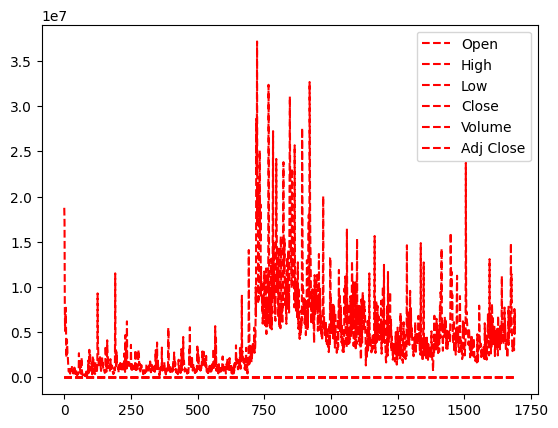

In [384]:
data.plot(ls="--",c="red")

In [385]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [386]:
data["Date"]=pd.to_datetime(data["Date"])

In [387]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [388]:
data.set_index(data["Date"],inplace=True)

In [389]:
data=data.drop(columns="Date")

In [390]:
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


<Axes: xlabel='Date'>

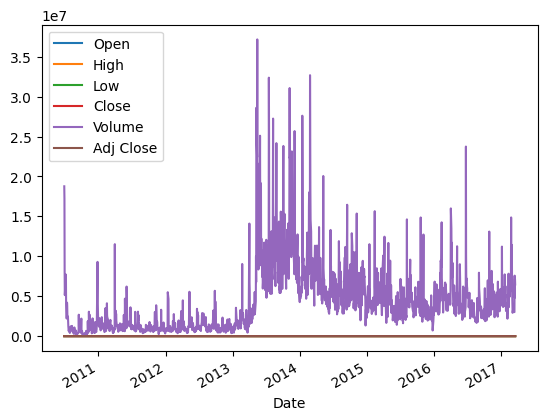

In [391]:
data.plot()

## Integrated

<Axes: xlabel='Date'>

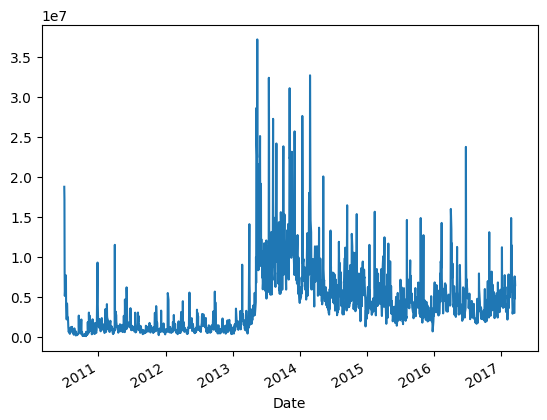

In [392]:
data["Volume"].plot()

In [393]:
from statsmodels.tsa.stattools import adfuller

In [394]:
def adf_test(series):
  result=adfuller(series)
  print("adf Statistics:{}".format(result[0]))
  print("p value:{}".format(result[1]))

  if(result[1]<=0.05):
    print("Reject Null Hypothesis.Data is Stationary...")
  else:
    print("Accept Null Hypothesis.Data is not Stationary...")

In [395]:
Volume_data=data["Volume"]
Volume_data.head()

Date
2010-06-29    18766300
2010-06-30    17187100
2010-07-01     8218800
2010-07-02     5139800
2010-07-06     6866900
Name: Volume, dtype: int64

In [396]:
adf_test(Volume_data)

adf Statistics:-2.6977273367352805
p value:0.07443236537654127
Accept Null Hypothesis.Data is not Stationary...


In [397]:
Volume_data["Volume 1 Difference"]=data["Volume"]-data["Volume"].shift(1)
Volume_data["Volume 12 Difference"]=data["Volume"]-data["Volume"].shift(12)

<ipython-input-397-a68e3d3454ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Volume_data["Volume 1 Difference"]=data["Volume"]-data["Volume"].shift(1)


In [398]:
Volume_data["Volume 1 Difference"]=Volume_data["Volume 1 Difference"].dropna()
Volume_data["Volume 12 Difference"]=Volume_data["Volume 12 Difference"].dropna()
adf_test(Volume_data["Volume 1 Difference"])

adf Statistics:-12.78791844707445
p value:7.18004787203809e-24
Reject Null Hypothesis.Data is Stationary...


In [399]:
adf_test(Volume_data["Volume 12 Difference"])

adf Statistics:-10.431613543131283
p value:1.6052726983134828e-18
Reject Null Hypothesis.Data is Stationary...


<Axes: xlabel='Date'>

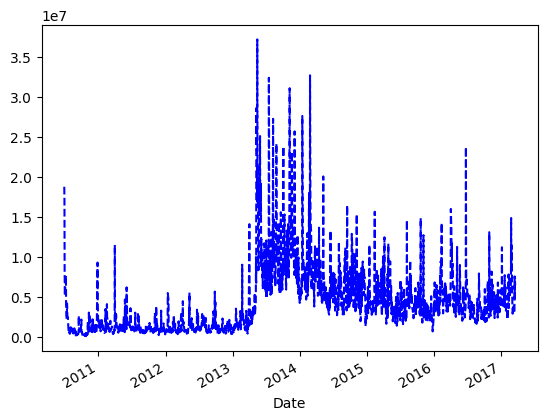

In [400]:
# Comparing the Volume with the Differencing Column by 1 Shift data..
data["Volume"].plot(ls="--",c="blue")

<Axes: xlabel='Date'>

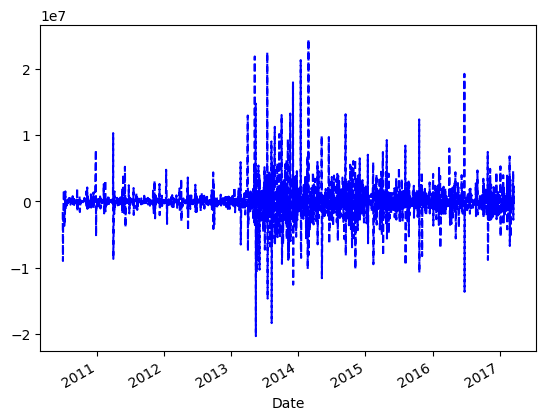

In [401]:
Volume_data["Volume 1 Difference"].plot(ls="--",c="blue")

<Axes: xlabel='Date'>

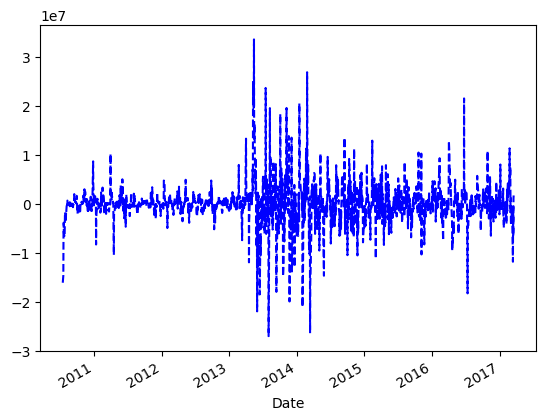

In [402]:
Volume_data["Volume 12 Difference"].plot(ls="--",c="blue")

## Auto Regression

In [403]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

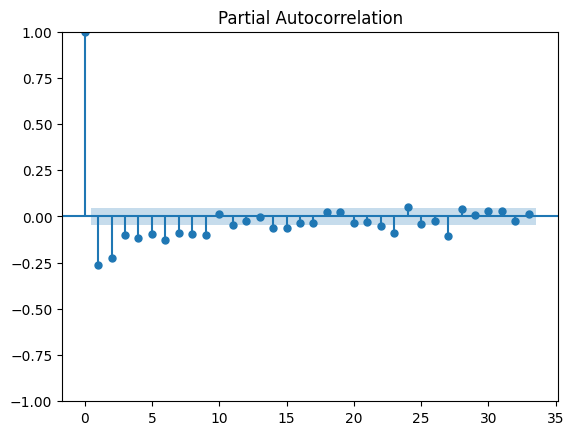

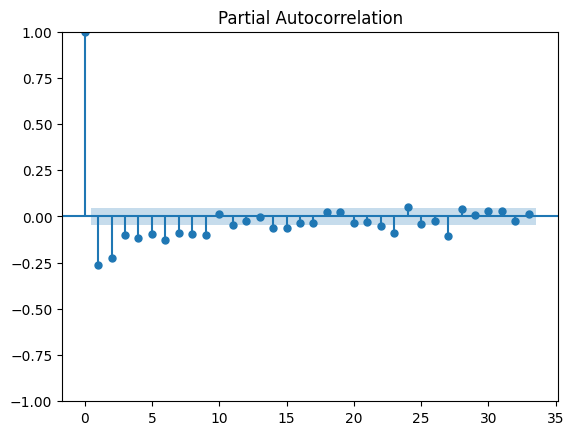

In [404]:
plot_pacf(Volume_data["Volume 1 Difference"])

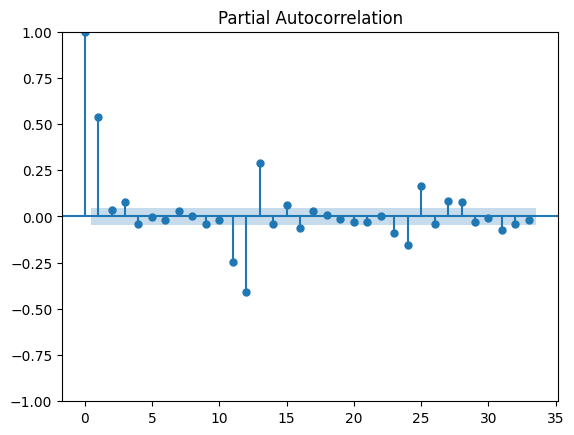

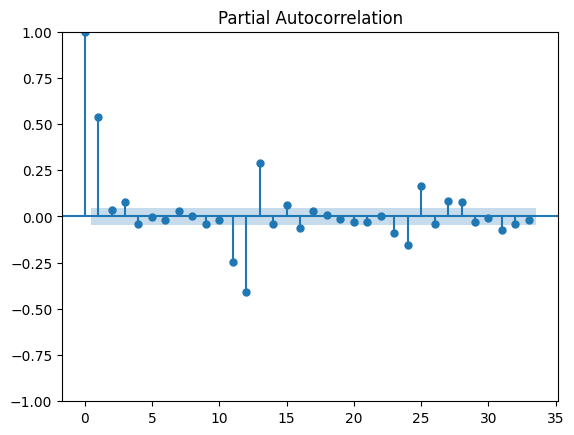

In [405]:
plot_pacf(Volume_data["Volume 12 Difference"])

## Moving Average

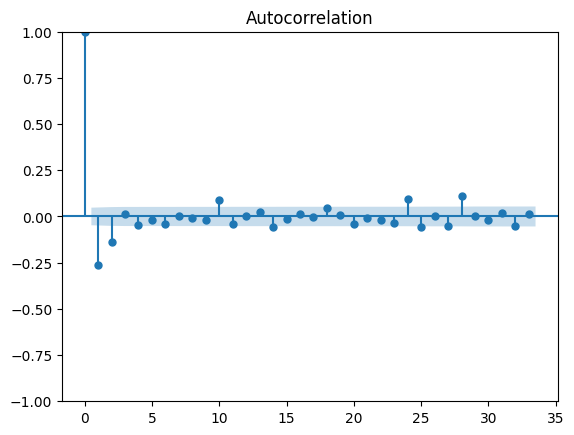

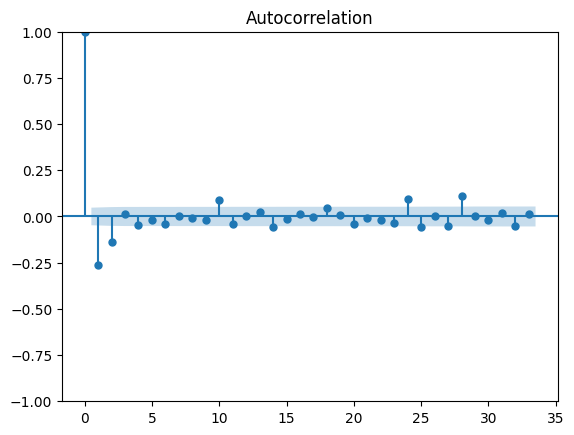

In [406]:
plot_acf(Volume_data["Volume 1 Difference"])

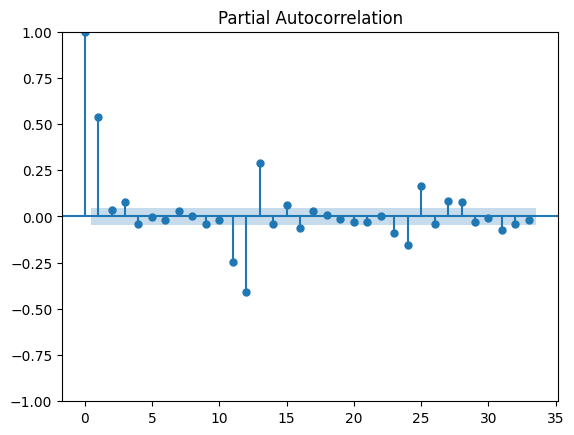

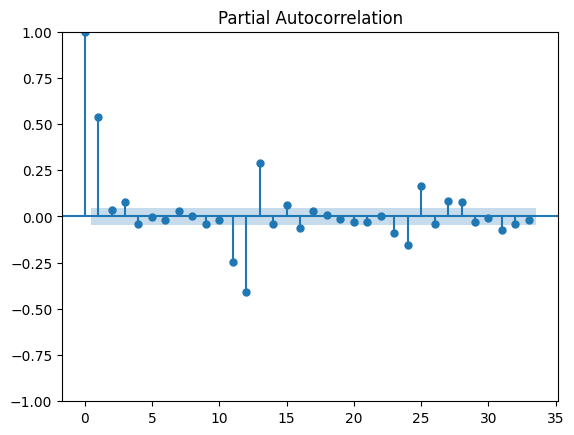

In [407]:
plot_pacf(Volume_data["Volume 12 Difference"])

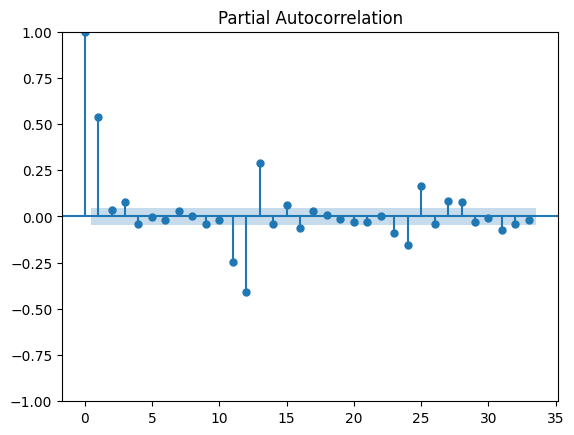

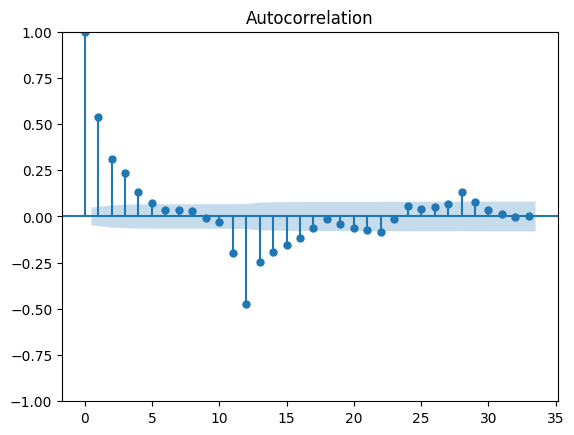

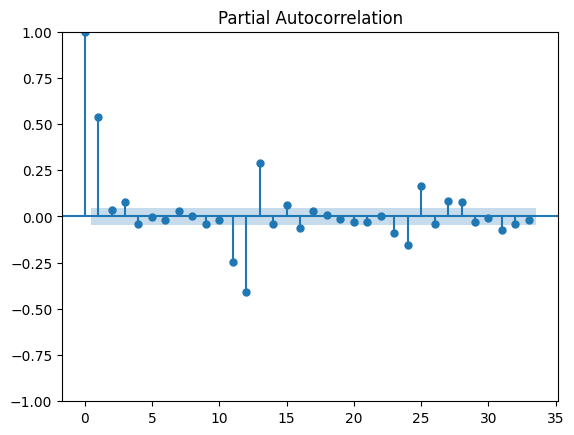

In [408]:
plot_acf(Volume_data["Volume 12 Difference"])
plot_pacf(Volume_data["Volume 12 Difference"])

In [409]:
# Splitting the data for train,test and validaion..
from datetime import datetime

In [410]:
train_data=Volume_data[datetime(2010,6,29):datetime(2014,12,31)]
test_data=Volume_data[datetime(2015,1,2):datetime(2017,3,17)]

In [411]:
train_data

Date
2010-06-29    18766300
2010-06-30    17187100
2010-07-01     8218800
2010-07-02     5139800
2010-07-06     6866900
                ...   
2014-12-24     1332200
2014-12-26     3327000
2014-12-29     2802500
2014-12-30     2903200
2014-12-31     2297500
Name: Volume, Length: 1136, dtype: object

# ARIMA

In [412]:
Volume_data

Date
2010-06-29 00:00:00                                              18766300
2010-06-30 00:00:00                                              17187100
2010-07-01 00:00:00                                               8218800
2010-07-02 00:00:00                                               5139800
2010-07-06 00:00:00                                               6866900
                                              ...                        
2017-03-15 00:00:00                                               4816600
2017-03-16 00:00:00                                               7100400
2017-03-17 00:00:00                                               6475900
Volume 1 Difference     Date
2010-06-30   -1579200.0
2010-07-01   -896...
Volume 12 Difference    Date
2010-07-16   -16145000.0
2010-07-19   -14...
Name: Volume, Length: 1694, dtype: object

In [413]:
from statsmodels.tsa.arima.model import ARIMA

In [414]:
np.asarray(train_data)
train_data=train_data.astype(float)

In [415]:
model_ARIMA=ARIMA(train_data,order=(6,1,5))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [416]:
model_ARIMA_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [417]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1136
Model:                 ARIMA(6, 1, 5)   Log Likelihood              -18403.564
Date:                Mon, 18 Sep 2023   AIC                          36831.127
Time:                        07:56:29   BIC                          36891.540
Sample:                             0   HQIC                         36853.947
                               - 1136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1804      0.090      2.014      0.044       0.005       0.356
ar.L2          0.0472      0.096      0.492      0.623      -0.141       0.235
ar.L3          0.1116      0.090      1.236      0.216      -0.065       0.289
ar.L4         -0.6713      0.065    -10.259      0.000      -0.800      -0.543
ar.L5          0.3887      0.067      5.807      0.000       0.258       0.520
ar.L6         -0.0682      0.025     -2.707      0.007      -0.118      -0.019
ma.L1         -0.5831      0.092     -6.324      0.000      -0.764      -0.402
ma.L2         -0.1943      0.088     -2.198      0.028      -0.368      -0.021
ma.L3         -0.1497      0.076     -1.978      0.048      -0.298      -0.001
ma.L4          0.7229      0.080      9.002      0.000       0.566       0.880
ma.L5         -0.7055      0.094     -7.476      0.000      -0.890      -0.521
sigma2        7.4e+12   9.56e-15   7.74e+26      0.000     7.4e+12     7.4e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             27386.80
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              11.20   Skew:                             3.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+42. Standard errors may be unstable.
"""

In [419]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [423]:
model_SARIMAX=SARIMAX(train_data,order=(6,1,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [424]:
model_SARIMAX_fit=model_SARIMAX.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
